In [1]:
import warnings
import pandas as pd
import numpy as np
import  matplotlib.pylab as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from arch import arch_model
from scipy.stats import kurtosis
from scipy.stats import skew



In [5]:
import pandas_datareader as pdr
import datetime 
aapl = pdr.get_data_yahoo('TSLA', 
                          start=datetime.datetime(2015, 10, 1), 
                          end=datetime.datetime(2021, 1, 1))

In [6]:
warnings.filterwarnings("ignore")
df= aapl
df.index 

DatetimeIndex(['2015-10-01', '2015-10-02', '2015-10-05', '2015-10-06',
               '2015-10-07', '2015-10-08', '2015-10-09', '2015-10-12',
               '2015-10-13', '2015-10-14',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1323, freq=None)

<AxesSubplot:xlabel='Date'>

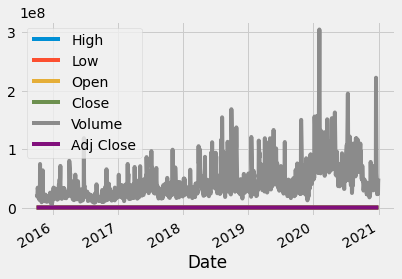

In [7]:
df.plot()

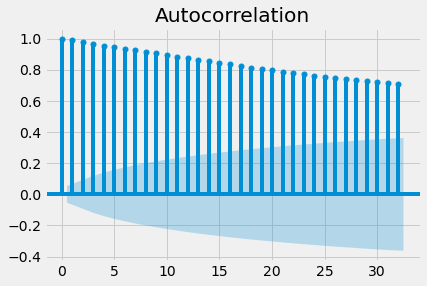

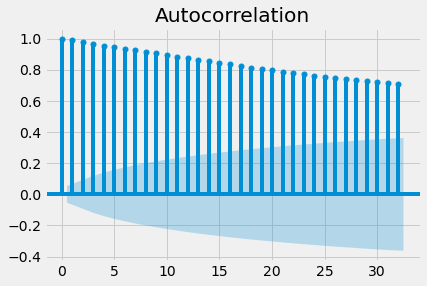

In [8]:
plot_acf(df['Close'])

In [9]:
diff_data=df['Close'].diff(1).dropna()

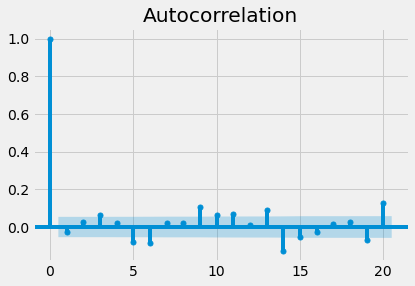

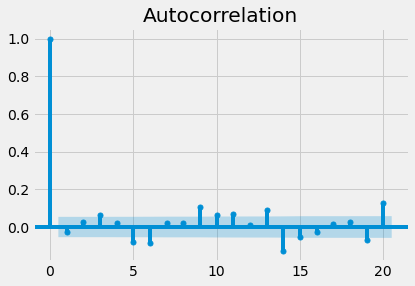

In [11]:
plot_acf(diff_data,lags=20)

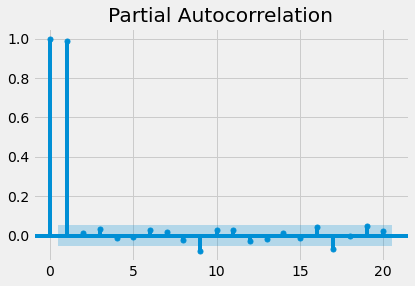

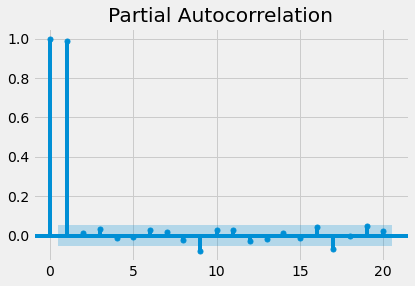

In [13]:
plot_pacf(df['Close'],lags=20) 

In [14]:
K=kurtosis(df['Close'])
print("Excess Kurtosis =%.2f" %K)  
print("Skewness  = %.2f" % skew(df['Close'])) 
print("Kurtosis  = %.2f" % kurtosis(df['Close'], fisher=False)) 
df['Close'].describe()

Excess Kurtosis =8.34
Skewness  = 2.95
Kurtosis  = 11.34


count    1323.000000
mean      100.006118
std       118.710446
min        28.733999
25%        46.102999
50%        60.754002
75%        70.984001
max       705.669983
Name: Close, dtype: float64

In [15]:
#GARCH(1,1)
GARCH = arch_model(df['Close'],p=1,q=1,dist='StudentsT')
res = GARCH.fit()
res.summary() 

Iteration:      1,   Func. Count:      7,   Neg. LLF: 10491.061320865083
Iteration:      2,   Func. Count:     14,   Neg. LLF: 57935.06453274409
Iteration:      3,   Func. Count:     21,   Neg. LLF: 11090.316501184927
Iteration:      4,   Func. Count:     30,   Neg. LLF: 6004.302667597218
Iteration:      5,   Func. Count:     36,   Neg. LLF: 6071.064826696373
Iteration:      6,   Func. Count:     43,   Neg. LLF: 5980.352567597392
Iteration:      7,   Func. Count:     49,   Neg. LLF: 5978.9549175145185
Iteration:      8,   Func. Count:     55,   Neg. LLF: 5970.154291741842
Iteration:      9,   Func. Count:     61,   Neg. LLF: 5918.854124069205
Iteration:     10,   Func. Count:     67,   Neg. LLF: 6265.938897974578
Iteration:     11,   Func. Count:     74,   Neg. LLF: 6126.298632576718
Iteration:     12,   Func. Count:     81,   Neg. LLF: 5916.684575652425
Iteration:     13,   Func. Count:     88,   Neg. LLF: 21888.517190716095
Iteration:     14,   Func. Count:     95,   Neg. LLF: 7048.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5480.04
Distribution:      Standardized Student's t   AIC:                           10970.1
Method:                  Maximum Likelihood   BIC:                           10996.0
                                              No. Observations:                 1323
Date:                      Sat, Feb 13 2021   Df Residuals:                     1322
Time:                              15:57:05   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            61.7230      0.789     78.262      0.000 [ 60.177, 63.269]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.2136      1.077      2.983  2.859e-03      [  1.102,  5.325]
alpha[1]       1.0000  2.415e-02     41.408      0.000      [  0.953,  1.047]
beta[1]        0.0000  2.370e-02      0.000      1.000 [-4.645e-02,4.645e-02]
                                Distribution                                
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
nu           304.3021     18.607     16.354  4.083e-60 [2.678e+02,3.408e+02]
============================================================================

Covariance estimator: robust
"""

<AxesSubplot:xlabel='Date'>

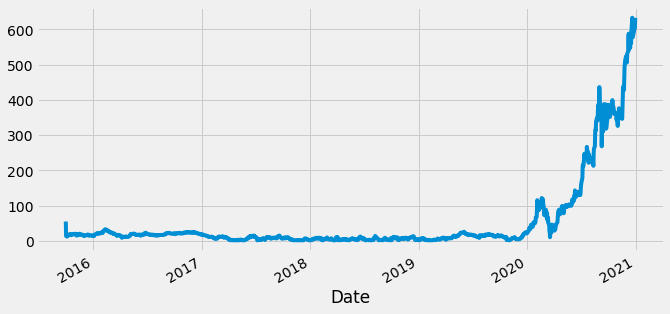

In [16]:
volatility=res.conditional_volatility
volatility.plot(figsize=(10,5))

In [17]:
#start and horizion period
start_p=len(volatility)-1
horizon_p=10
forecasts = res.forecast(start=start_p, horizon=10)
forecasts.variance.dropna().head()

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
Date,,,,,,,,,,
2020-12-31,414670.903867,414674.117483,414677.331099,414680.544715,414683.75833,414686.971946,414690.185562,414693.399177,414696.612793,414699.826409


In [18]:
mforecast=forecasts.variance.mean()
mforecast=pd.DataFrame(mforecast)
mforecast.columns = ['GARCH_predicted Volatility']

<AxesSubplot:>

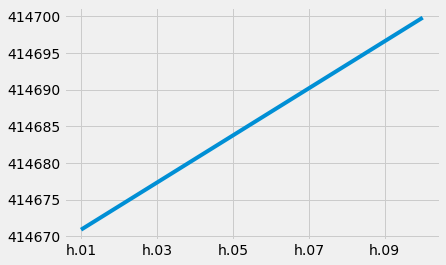

In [19]:
mforecast['GARCH_predicted Volatility'].plot()

In [20]:
#Fractionally Integrated GARCH
figarch = arch_model(df['Close'], vol= 'figarch',p=1,q=1,dist='StudentsT')
res_figarch = figarch.fit()
res_figarch.summary()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 6277.368318137017
Iteration:      2,   Func. Count:     15,   Neg. LLF: 258252.61449323577
Iteration:      3,   Func. Count:     24,   Neg. LLF: 5612.27092349442
Iteration:      4,   Func. Count:     31,   Neg. LLF: 5687.575864384384
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6025.526602804426
Iteration:      6,   Func. Count:     47,   Neg. LLF: 6033.352210404877
Iteration:      7,   Func. Count:     55,   Neg. LLF: 5874.272087632397
Iteration:      8,   Func. Count:     63,   Neg. LLF: 6158.6036969976885
Iteration:      9,   Func. Count:     71,   Neg. LLF: 6138.570930127322
Iteration:     10,   Func. Count:     79,   Neg. LLF: 6078.100534595262
Iteration:     11,   Func. Count:     87,   Neg. LLF: 6136.495531477411
Iteration:     12,   Func. Count:     95,   Neg. LLF: 6345.218903028836
Iteration:     13,   Func. Count:    103,   Neg. LLF: 6335.829475152702
Iteration:     14,   Func. Count:    111,   Neg. LLF: 6284.9571

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Constant Mean - FIGARCH Model Results                        
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                          FIGARCH   Log-Likelihood:               -5480.50
Distribution:      Standardized Student's t   AIC:                           10973.0
Method:                  Maximum Likelihood   BIC:                           11004.1
                                              No. Observations:                 1323
Date:                      Sat, Feb 13 2021   Df Residuals:                     1322
Time:                              15:58:01   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            61.7322      0.765     80.673      0.000 [ 60.232, 63.232]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.1649     15.811      0.200      0.841 [-27.824, 34.153]
phi        1.2648e-03      4.981  2.539e-04      1.000 [ -9.761,  9.763]
d              0.9975  3.513e-02     28.392 2.529e-177 [  0.929,  1.066]
beta       1.6038e-15      5.052  3.175e-16      1.000 [ -9.901,  9.901]
                                Distribution                                
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
nu           227.7911     15.943     14.288  2.598e-46 [1.965e+02,2.590e+02]
============================================================================

Covariance estimator: robust
"""

<AxesSubplot:xlabel='Date'>

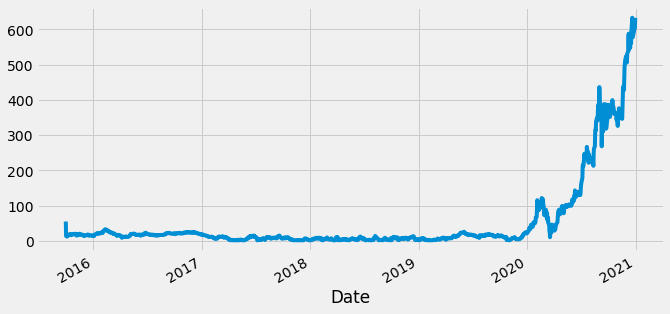

In [21]:
volatility_figarch=res.conditional_volatility
volatility_figarch.plot(figsize=(10,5))

In [22]:
forecasts_garch = res_figarch.forecast(start=start_p, horizon=10)

forecasts_garch.variance.dropna().head()

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
Date,,,,,,,,,,
2020-12-31,414556.932271,414476.409963,414411.876242,414356.861673,414308.335223,414264.600091,414224.595686,414187.607344,414153.126361,414120.775183


In [23]:
mforecast_garch=forecasts_garch.variance.mean()
mforecast_garch=pd.DataFrame(mforecast_garch)
mforecast_garch.columns = ['FIGARCH_predicted Volatility']

Iteration:      1,   Func. Count:      8,   Neg. LLF: 6277.368318137017
Iteration:      2,   Func. Count:     15,   Neg. LLF: 258252.61449323577
Iteration:      3,   Func. Count:     24,   Neg. LLF: 5612.27092349442
Iteration:      4,   Func. Count:     31,   Neg. LLF: 5687.575864384384
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6025.526602804426
Iteration:      6,   Func. Count:     47,   Neg. LLF: 6033.352210404877
Iteration:      7,   Func. Count:     55,   Neg. LLF: 5874.272087632397
Iteration:      8,   Func. Count:     63,   Neg. LLF: 6158.6036969976885
Iteration:      9,   Func. Count:     71,   Neg. LLF: 6138.570930127322
Iteration:     10,   Func. Count:     79,   Neg. LLF: 6078.100534595262
Iteration:     11,   Func. Count:     87,   Neg. LLF: 6136.495531477411
Iteration:     12,   Func. Count:     95,   Neg. LLF: 6345.218903028836
Iteration:     13,   Func. Count:    103,   Neg. LLF: 6335.829475152702
Iteration:     14,   Func. Count:    111,   Neg. LLF: 6284.9571

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Constant Mean - FIGARCH Model Results                        
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                          FIGARCH   Log-Likelihood:               -5480.50
Distribution:      Standardized Student's t   AIC:                           10973.0
Method:                  Maximum Likelihood   BIC:                           11004.1
                                              No. Observations:                 1323
Date:                      Sat, Feb 13 2021   Df Residuals:                     1322
Time:                              15:59:11   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            61.7322      0.765     80.673      0.000 [ 60.232, 63.232]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.1649     15.811      0.200      0.841 [-27.824, 34.153]
phi        1.2648e-03      4.981  2.539e-04      1.000 [ -9.761,  9.763]
d              0.9975  3.513e-02     28.392 2.529e-177 [  0.929,  1.066]
beta       1.6038e-15      5.052  3.175e-16      1.000 [ -9.901,  9.901]
                                Distribution                                
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
nu           227.7911     15.943     14.288  2.598e-46 [1.965e+02,2.590e+02]
============================================================================

Covariance estimator: robust
"""

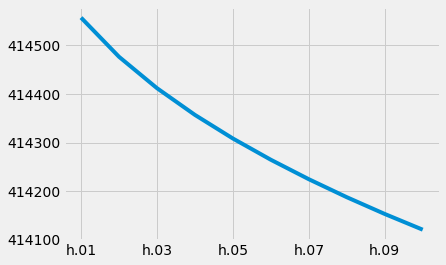

In [24]:
mforecast_garch['FIGARCH_predicted Volatility'].plot()
fiaparch=arch_model(df['Close'], vol= 'figarch', p=1, o=1, q=1,dist='StudentsT')
res_fiaparch = fiaparch.fit()
res_fiaparch.summary()

In [25]:
#Asymmetric Power ARCH (APARCH)

APARCH = arch_model(df['Close'],p=1,q=1,power=2.0,dist='StudentsT')
res2 = APARCH.fit()
res2.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 10491.061320865083
Iteration:      2,   Func. Count:     14,   Neg. LLF: 57935.06453274409
Iteration:      3,   Func. Count:     21,   Neg. LLF: 11090.316501184927
Iteration:      4,   Func. Count:     30,   Neg. LLF: 6004.302667597218
Iteration:      5,   Func. Count:     36,   Neg. LLF: 6071.064826696373
Iteration:      6,   Func. Count:     43,   Neg. LLF: 5980.352567597392
Iteration:      7,   Func. Count:     49,   Neg. LLF: 5978.9549175145185
Iteration:      8,   Func. Count:     55,   Neg. LLF: 5970.154291741842
Iteration:      9,   Func. Count:     61,   Neg. LLF: 5918.854124069205
Iteration:     10,   Func. Count:     67,   Neg. LLF: 6265.938897974578
Iteration:     11,   Func. Count:     74,   Neg. LLF: 6126.298632576718
Iteration:     12,   Func. Count:     81,   Neg. LLF: 5916.684575652425
Iteration:     13,   Func. Count:     88,   Neg. LLF: 21888.517190716095
Iteration:     14,   Func. Count:     95,   Neg. LLF: 7048.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5480.04
Distribution:      Standardized Student's t   AIC:                           10970.1
Method:                  Maximum Likelihood   BIC:                           10996.0
                                              No. Observations:                 1323
Date:                      Sat, Feb 13 2021   Df Residuals:                     1322
Time:                              15:59:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            61.7230      0.789     78.262      0.000 [ 60.177, 63.269]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.2136      1.077      2.983  2.859e-03      [  1.102,  5.325]
alpha[1]       1.0000  2.415e-02     41.408      0.000      [  0.953,  1.047]
beta[1]        0.0000  2.370e-02      0.000      1.000 [-4.645e-02,4.645e-02]
                                Distribution                                
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
nu           304.3021     18.607     16.354  4.083e-60 [2.678e+02,3.408e+02]
============================================================================

Covariance estimator: robust
"""

                     h.01           h.02           h.03           h.04  \
Date                                                                     
2020-12-31  414670.903867  414674.117483  414677.331099  414680.544715   

                    h.05           h.06           h.07           h.08  \
Date                                                                    
2020-12-31  414683.75833  414686.971946  414690.185562  414693.399177   

                     h.09           h.10  
Date                                      
2020-12-31  414696.612793  414699.826409  


<AxesSubplot:xlabel='Date'>

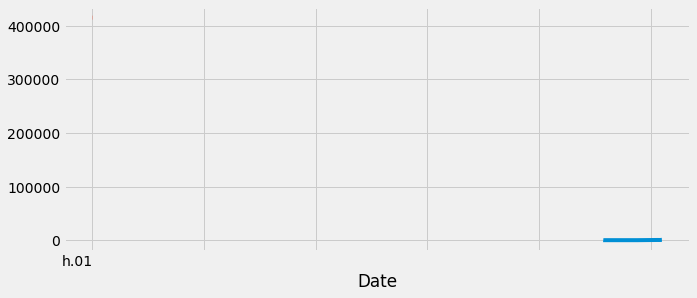

In [26]:
volatility=res2.conditional_volatility
volatility.plot(figsize=(10,5))
start_p=len(volatility)-1
horizon_p=10
forecasts2 = res2.forecast(start=start_p, horizon=10)
print(forecasts2.variance.dropna().head())
mforecast2=forecasts2.variance.mean()
mforecast2=pd.DataFrame(mforecast2)
mforecast2.columns = ['APARCH_predicted Volatility']
mforecast2['APARCH_predicted Volatility'].plot() 

In [ ]:
#Q2#



# # Estimating the univariate GARCH model for DLİSBANK

# In this model, we can see İŞ Bank's GJR GARCH (1,1) model. The coefficients of V, Alpha1, Beta1 and Gamma1 are statistically significant. The beta1 coefficient value is 0.842486, which is a high value. The closer Alpha1 and beta1 get to 1, the more consistent the volatility is. Stock values are kurtotic and sloping to the left. This can lead to extreme returns i.e. possible large losses and frequent small gains.

# ### Estimating the univariate GARCH model for DLAKBANK

# In this model, we can see AkBank's GJR GARCH (1,1) model. The coefficients of V, Alpha1, Beta1 and Gamma1 make great sense. Beta (0.84) high, alpha (0.4) low, these values are similar to isbank values. Stock information is slightly less kurtotic and shows current kurtosis and is very similar to DLISBANK values. Unlike DLISBANK, the right is skewed to the right.

# ### Estimating the univariate GARCH model for DLHALKBANK

# In this model, we can see HalkBank's GJR GARCH (1,1) model. The V and Beta1 coefficients are statistically significant. The value of the Beta1 coefficient is a low value of 0.638213, thus indicating the persistence of low long-term volatility. Alpha is higher than the other two models, resulting in higher ARCH-effective short-term persistence for DLHALKBANK. The DLHALKBANK univariate GARCH model results in the highest risk of Kurtosis and a negative skewness.

# ## Multivariate

# In this model, we can see the multivariate GARCH model as Dynamic Correlation Model (Engle). Determines whether the volatility brought to a stock causes volatility in other stock returns. Rho is the correlation coefficient, alpha represents short term variability and beta represents current long term volatility. All the coefficients are significant. The beta value (0.977714) is very important.

# # Conditional Correlation Graphs 

# The correlations of all three graphs change over time.
# 
# The correlation between İşbank and Akbank varies between 0.6 and 0.9. Most of the time, the correlation is above 0.7, which means that fluctuation in İşbank may cause volatility in Akbank.
# 
# The correlation between İşbank and Halkbank varies between 0.5 and 0.8. Most of the time the correlation is above 0.6, which means that fluctuation in İşbank can cause volatility in Halkbank.
# 
# A similar situation can be seen in the Akbank and Halkbank correlation chart. It ranges from 0.5 to 0.8. However, sometimes the correlation drops to 0.5. Often times more than that. Therefore, the fluctuation in Akbank may cause fluctuation in Halkbank or vice versa.